In [1]:
%pylab inline

from PyTools import err, binner
import pres_style

Populating the interactive namespace from numpy and matplotlib


In [ ]:
ngal = 120

dp = loadtxt("../outputs/dynbas+/dynbas3_nd_4SSPs_SNR80.all", usecols=(3,6,7,8,9,1))[:ngal*7]
tg = loadtxt("../outputs/dynbas+/tgaspex_nd_4SSPs_SNR80.all", usecols=(3,6,7,8,9,1))[:ngal*7]
ep = loadtxt("../outputs/dynbas+/dynbas3_nd_4SSPs_SNR80.all", usecols=(10,))[:ngal*7]
np = loadtxt("../outputs/dynbas+/tgaspex_nd_4SSPs_SNR80.all", usecols=(4,))[:ngal*7]

dp[:, 0] /=1e6
tg[:, 0] /=1e6

tp = []
for i in xrange(ngal):
    tp.append(loadtxt("../inputs/set3+refill/bc03/stelib/SSAG3{0:03d}_z0p00nd.tparam".format(i+1), usecols=(7,16,19,1,1,8)))

tp = array(tp)
tp[:, 3:5] = log10(tp[:, 3:5])
rl = [True]+5*[False]
cp = map(str, ep[:7])
lb = "M log_t_M log_t_L log_Z_M log_Z_L Av".split()

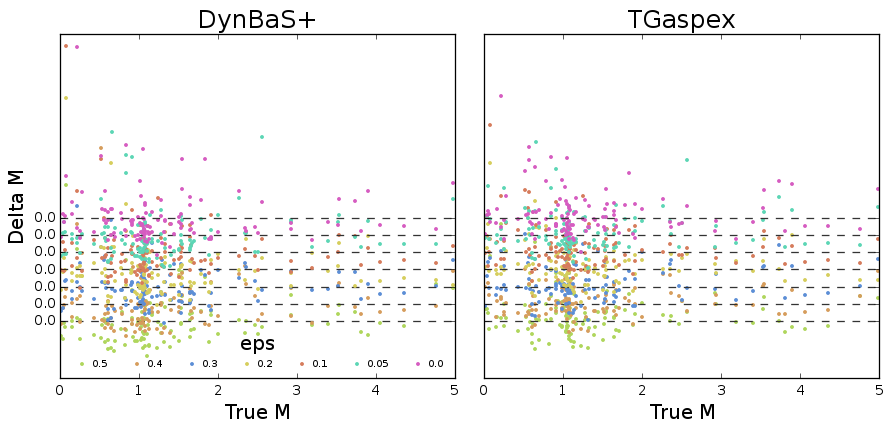

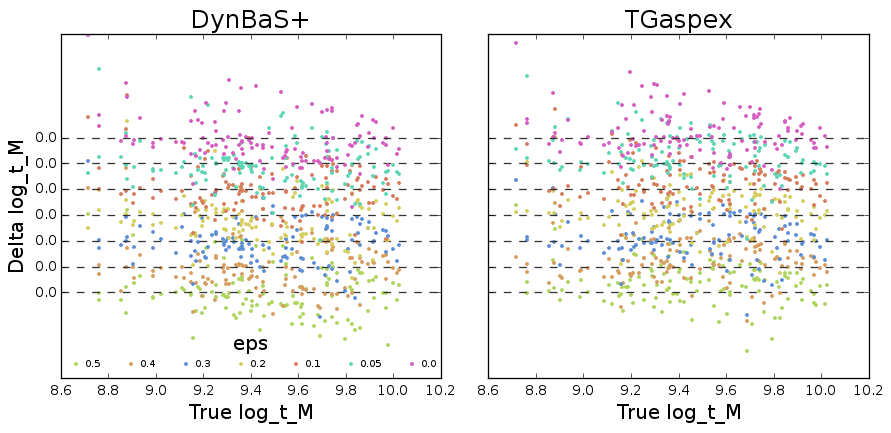

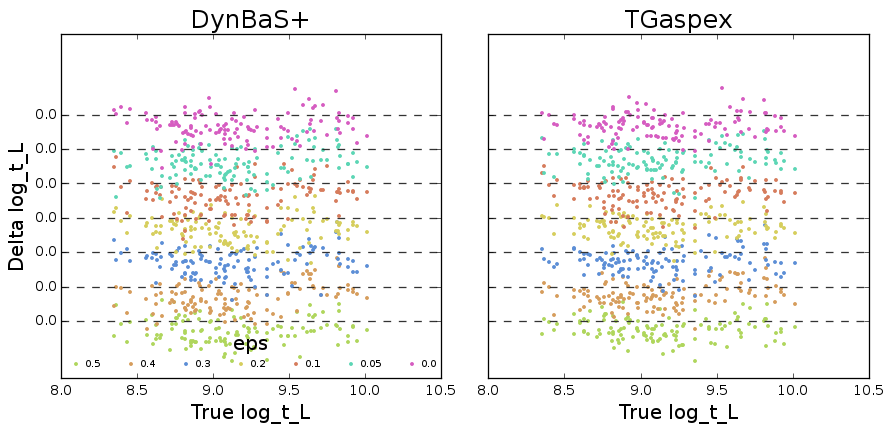

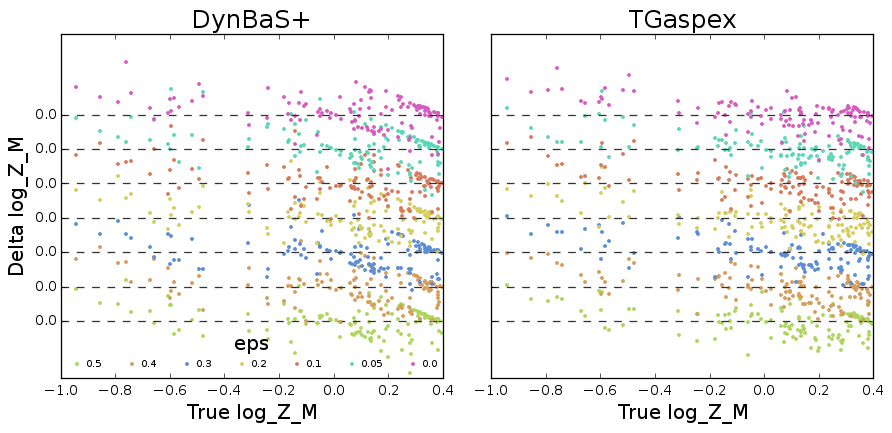

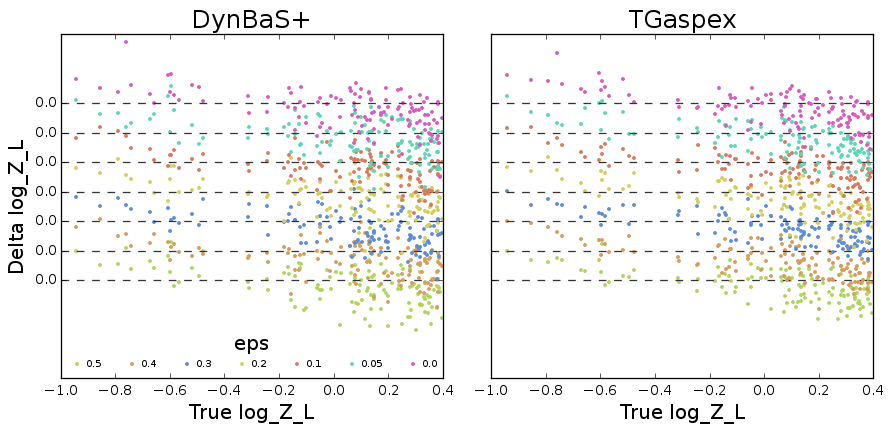

In [4]:
step=0.3

for j in xrange(len(lb)-1):
    fig, (axd, axg) = subplots(1, 2, sharey=True, figsize=(10, 5))
    for i in xrange(7):
        axd.set_title("DynBaS+")
        axg.set_title("TGaspex")
        axd.plot(tp[:, j], err(tp[:, j], dp[i::7, j], rl[j])+i*step, ".", ms=4, label=cp[i])
        axg.plot(tp[:, j], err(tp[:, j], tg[i::7, j], rl[j])+i*step, ".", ms=4)
        axd.axhline(i*step, ls="--", color="0.2")
        axg.axhline(i*step, ls="--", color="0.2")

    axd.legend(loc=8, title="eps", ncol=7, fontsize=8, handletextpad=0.01)
    axd.set_yticks([i*step for i in xrange(7)])
    axd.set_yticklabels([0.0]*7)

    axd.set_xlabel("True "+lb[j])
    axg.set_xlabel("True "+lb[j])
    axd.set_ylabel("Delta "+lb[j])
    fig.tight_layout()
    
    savefig("residuals_vs_true_"+lb[j], bbox_inches="tight")

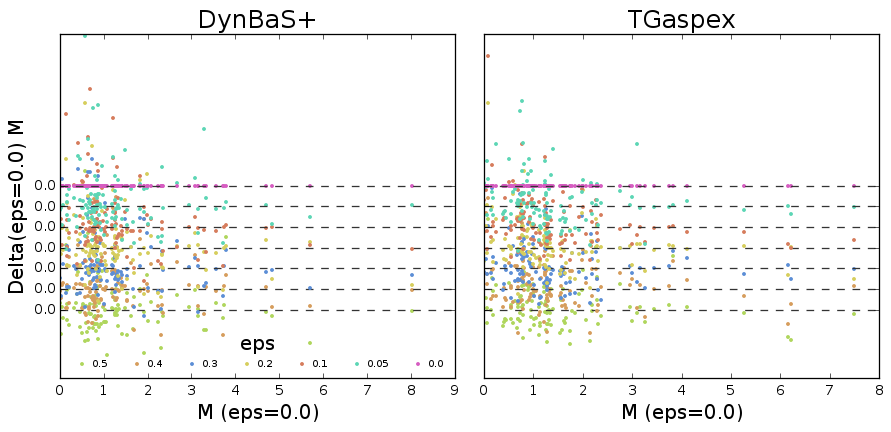

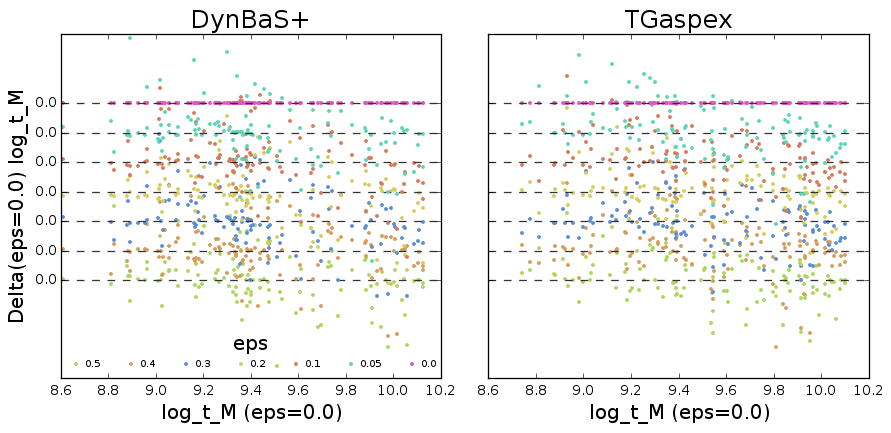

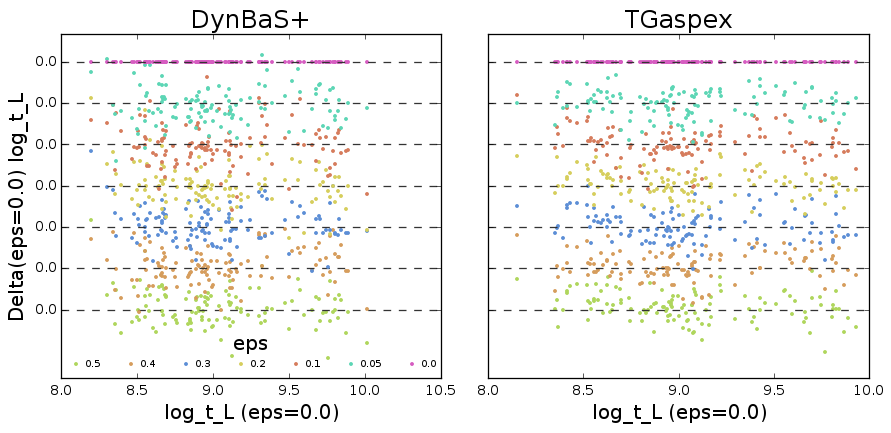

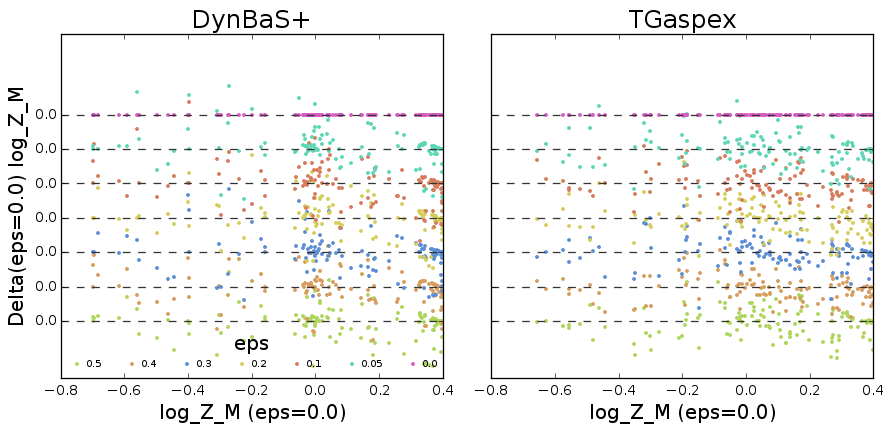

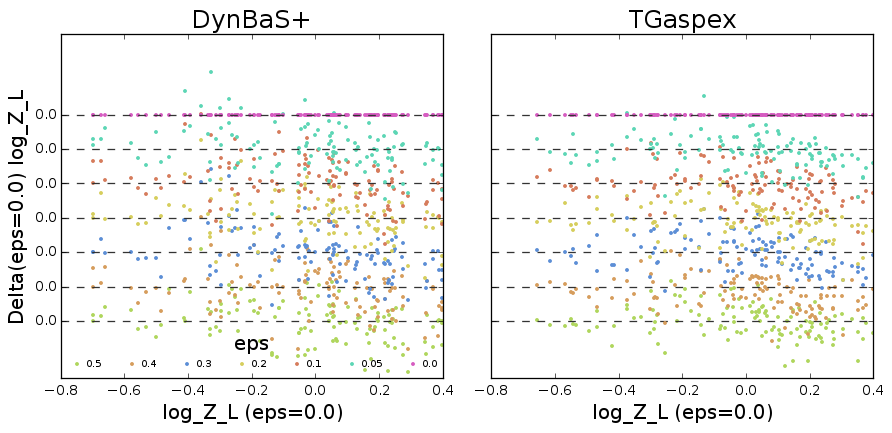

In [5]:
step=0.3
eps = 6
for j in xrange(len(lb)-1):
    fig, (axd, axg) = subplots(1, 2, sharey=True, figsize=(10, 5))
    for i in xrange(7):
        axd.set_title("DynBaS+")
        axg.set_title("TGaspex")
        axd.plot(dp[eps::7, j], err(dp[eps::7, j], dp[i::7, j], rl[j])+i*step, ".", ms=4, label=cp[i])
        axg.plot(tg[eps::7, j], err(tg[eps::7, j], tg[i::7, j], rl[j])+i*step, ".", ms=4, label=cp[i])
        axd.axhline(i*step, ls="--", color="0.2")
        axg.axhline(i*step, ls="--", color="0.2")

    axd.legend(loc=8, title="eps", ncol=7, fontsize=8, handletextpad=0.01)
    axd.set_yticks([i*step for i in xrange(7)])
    axd.set_yticklabels([0.0]*7)

    axd.set_xlabel(lb[j]+" (eps={})".format(ep[:7][eps]))
    axg.set_xlabel(lb[j]+" (eps={})".format(ep[:7][eps]))
    axd.set_ylabel("Delta(eps={}) ".format(ep[:7][eps])+lb[j])
    fig.tight_layout()
    
    savefig("diff_eps_vs_eps_"+lb[j], bbox_inches="tight")

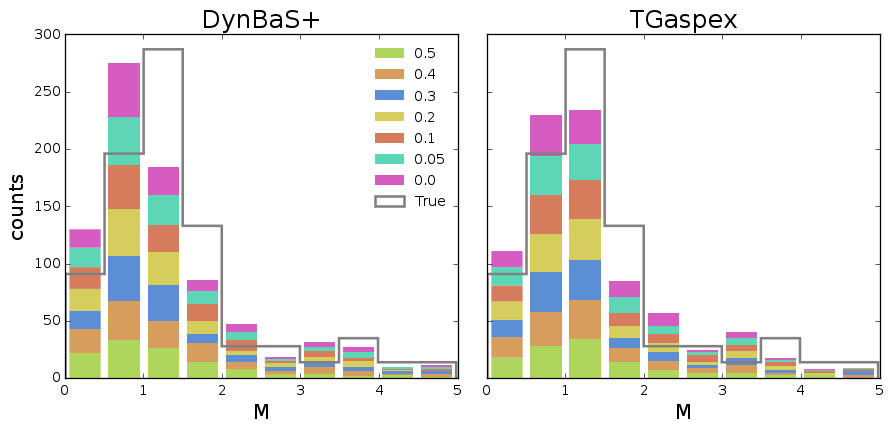

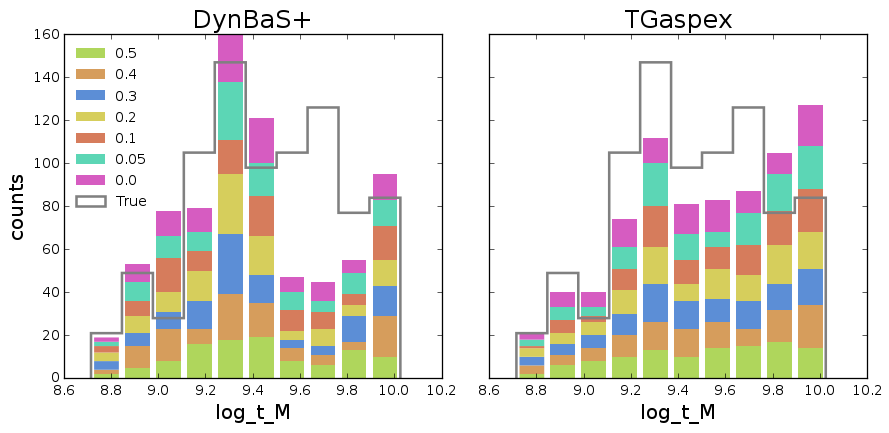

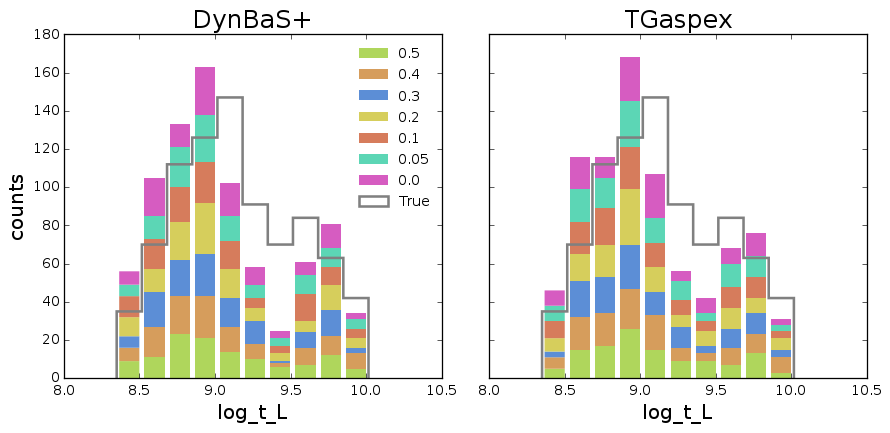

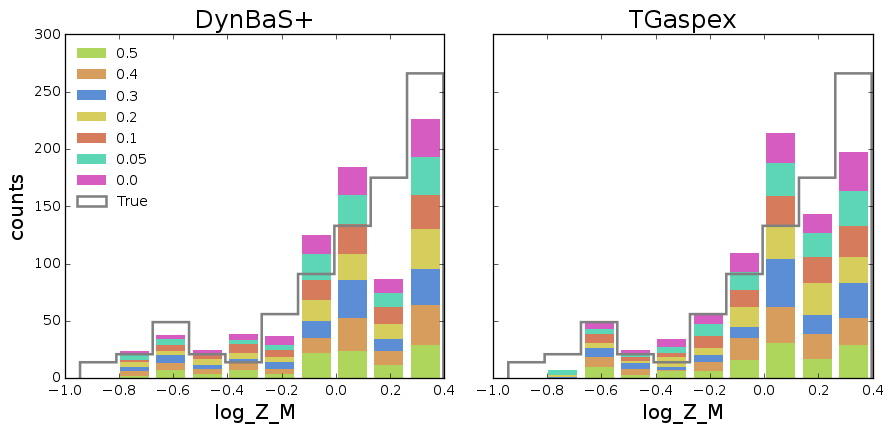

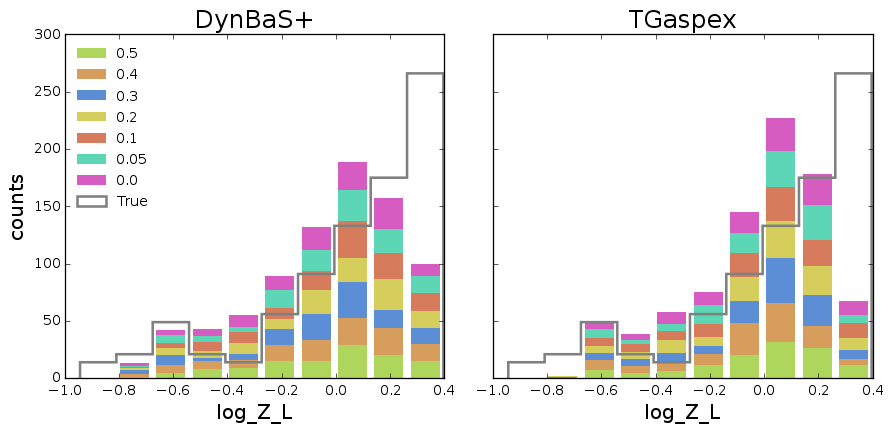

In [6]:
for j in xrange(len(lb)-1):
    fig, (axd, axg) = subplots(1, 2, sharey=True, figsize=(10, 5))
    axd.set_title("DynBaS+")
    axg.set_title("TGaspex")
    axd.hist([dp[i::7, j] for i in xrange(7)], 10, range=(tp[:, j].min(), tp[:, j].max()), histtype="barstacked", lw=0, label=cp)
    axd.hist(repeat(tp[:, j], 7, axis=0), 10, range=(tp[:, j].min(), tp[:, j].max()), histtype="step", lw=2, color="0.5", label="True")
    axg.hist([tg[i::7, j] for i in xrange(7)], 10, range=(tp[:, j].min(), tp[:, j].max()), histtype="barstacked", lw=0, label=cp)
    axg.hist(repeat(tp[:, j], 7, axis=0), 10, range=(tp[:, j].min(), tp[:, j].max()), histtype="step", lw=2, color="0.5", label="True")
    
    axd.set_xlabel(lb[j])
    axg.set_xlabel(lb[j])
    axd.set_ylabel("counts")
    axd.legend(loc=0)
    fig.tight_layout()
    
    savefig("dist_"+lb[j], bbox_inches="tight")